## Calculate pre-match $p_0$ for each match in Wimbledon

In [8]:
%run '/Users/noahjillson/Desktop/MCM/prematch_calculations.ipynb'

0.6267299999999998 0.7444099999999999 0.5236600000000002 0.26203000000000004 0.48307
0.6620106475 0.34453760080000007 1.0065482483000001
{('Jannik Sinner', 'Novak Djokovic'): [0.5782509008, 0.6231509008], ('Carlos Alcaraz', 'Novak Djokovic'): [0.5801509007999999, 0.6106163008000001], ('Jannik Sinner', 'Quentin Halys'): [0.6682509008, 0.5961509007999999], ('Lorenzo Musetti', 'Hubert Hurkacz'): [0.6213509008, 0.6397509008], ('Daniil Medvedev', 'Jiri Lehecka'): [0.6539163008, 0.5802855008], ('Daniil Medvedev', 'Marton Fucsovics'): [0.6239163008, 0.5688855008], ('Grigor Dimitrov', 'Holger Rune'): [0.6013566008, 0.6195836008], ('Andrey Rublev', 'Alexander Bublik'): [0.6537490008000001, 0.5942855008000001], ('Carlos Alcaraz', 'Holger Rune'): [0.5965566008, 0.5833163008], ('Jannik Sinner', 'Daniel Elahi Galan'): [0.6319836008, 0.5621509008], ('Daniel Elahi Galan', 'Mikael Ymer'): [0.5696163008, 0.5686836008], ('Hubert Hurkacz', 'Novak Djokovic'): [0.5997509007999999, 0.6731509008000001], ('Al

## Defining the Model

In [89]:
# At the moment, this model is a placeholder. It likely needs to be learned using Gradient Descent
# Optimization of this type would be outside the scope of this notebook. It will later be addressed
# and an optimal value for n should be imported
n = 100
player_numbers = [1, 2]

#### Sub Functions 

In [19]:
# Weight function that determines how heavility weighted the pre-match predictions are favored
# compared to the in-match predictions calculated from score_seq
def theta(score_seq):
    return n / (n + len(score_seq))

In [81]:
# The percentage of points won on serve give the current score sequence
def p_bar(score_seq, i):
    serving_seq = filter(lambda x: x['server'] == str(i), score_seq)
    won_serving_seq = filter(lambda x: x['point_victor'] == str(i), filter(lambda x: x['server'] == str(i), score_seq))
    d = len(list(serving_seq))
    n = len(list(won_serving_seq))
    if (d == 0):
        return 0
    # print("p_bar:", n/d, d, n)
    return (n/d) # points won on serve / points served)

#### The Model

In [68]:
def dynamic_model(score_seq, p0, i):
    return theta(score_seq) * p0 + (1 - theta(score_seq)) * p_bar(score_seq, i)

## Converting match data to score sequences

In [17]:
sequences = dict()
for m in matches:
    sequences[m] = []
    for r in all_points:
        if r['player1'] == m[0] and r['player2'] == m[1]:
            sequences[m].append(r)

202

In [82]:
for s in sequences:
    for p in player_numbers:
        for m in range(1,len(sequences[s])):
            print(dynamic_model(sequences[s][:m], p_dict[s][p - 1], p))
        

0.19275030026666665
0.11565018016
0.08260727154285713
0.06425010008888889
0.05256826370909091
0.044480838523076924
0.03855006005333333
0.03401475887058823
0.030434257936842103
0.02753575718095238
0.025141343513043476
0.503130036032
0.6633920086716049
0.502698306924138
0.40575002905806457
0.3407550778020202
0.3403309781180952
0.33995272704864865
0.3396132709606837
0.3393069325398374
0.339029090716279
0.3387759459437037
0.431756098193313
0.5015969571591836
0.5560005623250545
0.501476432090566
0.5460508428244627
0.5460299201097287
0.5460104158841294
0.545992190624143
0.545975122523521
0.5459591047675525
0.5459440432955223
0.5459298549523057
0.5459164659523688
0.583263710969863
0.6148894991901539
0.6420181007525048
0.6655474797569619
0.6655751140016459
0.665601416475502
0.6656264811858823
0.6656503934957855
0.665673231095131
0.6862994604483517
0.6463189533925364
0.6657359743943859
0.6831181590424309
0.6987702111191919
0.6987945633742574
0.6988179699106796
0.6988404847695239
0.6988621579514

In [63]:
len(list(filter(lambda x: x['server'] == str(2), sequences[('Jannik Sinner', 'Novak Djokovic')][:11] )))

10

In [112]:
sinner_v_djokovic = ('Jannik Sinner', 'Novak Djokovic')
print(p_dict[sinner_v_djokovic])

p_rally_sinner = []
p_rally_djokovic = []
for m in range(1,len(sequences[sinner_v_djokovic])):
    p_rally_sinner.append(dynamic_model(sequences[sinner_v_djokovic][:m], p_dict[sinner_v_djokovic][0], 1))
    p_rally_djokovic.append(dynamic_model(sequences[sinner_v_djokovic][:m], p_dict[sinner_v_djokovic][1], 2))

print(p_rally_sinner)
print(p_rally_djokovic)


[0.5782509008, 0.6231509008]
[0.5725256443564356, 0.5669126478431372, 0.561408641553398, 0.5560104815384616, 0.5507151436190476, 0.5455197177358491, 0.5404214026168224, 0.5354175007407407, 0.5305054135779816, 0.525682637090909, 0.5209467574774774, 0.5698668757142857, 0.5884226260766962, 0.5686411410526315, 0.5550007833043478, 0.5444691673563218, 0.5426645875783476, 0.5408905938983051, 0.5391464152380953, 0.5374313062222222, 0.5357445461157024, 0.5340854378142076, 0.5502620563995354, 0.5631055651612903, 0.5737118317511111, 0.5621038895238095, 0.57127844730136, 0.5710766980681817, 0.5708780767300916, 0.570682511104895, 0.5704899312144344, 0.5703002692011019, 0.5701134592481203, 0.5699294375033921, 0.569748142006734, 0.5795962505882353, 0.5882797142279618, 0.5960410254244306, 0.6030582020143884, 0.6035125481904762, 0.6039604497399527, 0.6044020428169014, 0.6048374597668997, 0.6052668292592592, 0.6121557936551724, 0.5999301093311845, 0.6065198871655328, 0.6126161847510668, 0.61828919516778

### Calculating Probability of winning a Game

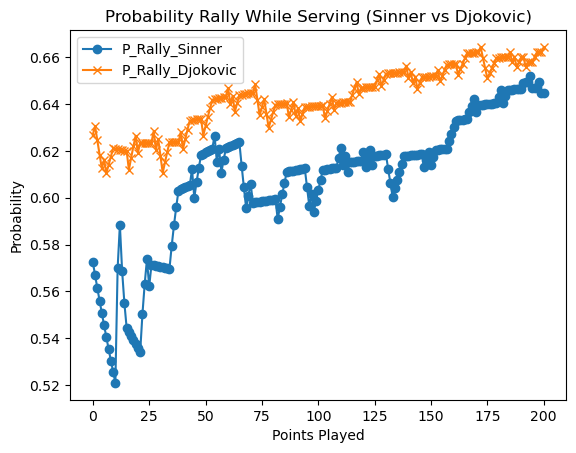

In [115]:
import matplotlib.pyplot as plt
# Plotting the data
plt.plot(p_rally_sinner, label='P_Rally_Sinner', marker='o')
plt.plot(p_rally_djokovic, label='P_Rally_Djokovic', marker='x')

# Adding labels and title
plt.xlabel('Points Played')
plt.ylabel('Probability')
plt.title('Probability Rally While Serving (Sinner vs Djokovic)')

# Adding legend
plt.legend()

# Show the plot
plt.show()

##### Defining Our Function/Model

In [138]:
# P_GA represents the probability that player A wins the game 
# P_RA represents the probability that player A wins the rally (point) while serving
# game_score_tup gives the score in (player1, player2)

def P_GA_40(P_RA, game_score_tup, player_idx, opp_idx):
    if (int(game_score_tup[opp_idx]) == 0):
        return P_RA**(4 - int(game_score_tup[player_idx]))
    return 0

def P_GA_41(P_RA, q_ra, game_score_tup, player_idx, opp_idx):
    if (int(game_score_tup[opp_idx]) <= 1):
        return (P_RA**(4 - int(game_score_tup[player_idx]))) * q_ra
    return 0

def P_GA_42(P_RA, q_ra, game_score_tup, player_idx, opp_idx):
    if (int(game_score_tup[opp_idx]) <= 2):
        return 10 * ((P_RA**(4 - int(game_score_tup[player_idx]))) * (q_ra**(2 - int(game_score_tup[opp_idx]))))
    return 0

def P_GA_33(P_RA, q_ra, game_score_tup, player_idx, opp_idx):
    return 20 * (P_RA**(3 - int(game_score_tup[player_idx]))) * (q_ra**(3-int(game_score_tup[opp_idx])))

def P_GA(P_RA, game_score_tup, player_idx, opp_idx):
    q_ra = 1 - P_RA
    print(P_GA_40(P_RA, game_score_tup, player_idx, opp_idx), P_GA_41(P_RA, q_ra, game_score_tup, player_idx, opp_idx), P_GA_42(P_RA, q_ra, game_score_tup, player_idx, opp_idx), P_GA_33(P_RA, q_ra, game_score_tup, player_idx, opp_idx))
    return P_GA_40(P_RA, game_score_tup, player_idx, opp_idx) + P_GA_41(P_RA, q_ra, game_score_tup, player_idx, opp_idx) + P_GA_42(P_RA, q_ra, game_score_tup, player_idx, opp_idx) + P_GA_33(P_RA, q_ra, game_score_tup, player_idx, opp_idx)

def P_GA_1(P_RA):
    print(P_RA)
    q_ra = 1 - P_RA
    return (P_RA**4) * (1 + 4*q_ra + 10*(q_ra ** 2)) + ( 20*((P_RA*q_ra)**3)*(P_RA**2) ) / (1 - 2*P_RA*q_ra)

#### Separating Score Sequences Into Game Sequences

In [128]:
def get_score_tup(point):
    score_map = {
        ('0', '0') : (0, 0),
        ('15', '0') : (1, 0),
        ('30', '0') : (2, 0),
        ('40', '0') : (3, 0),
        ('0', '15') : (0, 1),
        ('15', '15') : (1, 1),
        ('30', '15') : (2, 1),
        ('40', '15') : (3, 1),
        ('0', '30') : (0, 2),
        ('15', '30') : (1, 2),
        ('30', '30') : (2, 2),
        ('40', '30') : (3, 2),
        ('0', '40') : (0, 3),
        ('15', '40') : (1, 3),
        ('30', '40') : (2, 3),
        ('40', '40') : (3, 3),
        ('AD', '40') : (4, 3),
        ('40', 'AD') : (3, 4),
    }

    return score_map[(point['p1_score'], point['p2_score'])]

In [139]:
def score_seq_to_game_seq(score_seq):
    game_no = '1'
    game_seq = []
    curr_game = []

    for r in score_seq:
        if game_no != r['game_no']:
            game_no = r['game_no']
            game_seq.append(curr_game)
            curr_game = [r]
        else:
            curr_game.append(r)
    
    game_seq.append(curr_game)
    return game_seq

In [135]:
games_sinner_djokovic = score_seq_to_game_seq(sequences[sinner_v_djokovic])

In [140]:
# Djokovic begins the match by serving (game 0)
# p_rally_djokovic
# games_sinner_djokovic


points_played = 0
P_games = []
# for idg, g in enumerate(games):
#     for r in g:
#         points_played += 1
#         P_GA(p_rally_djokovic[points_played])
g = games_sinner_djokovic[0]
for r in g:
    points_played += 1
    P_games.append(P_GA(p_rally_djokovic[points_played], get_score_tup(r), 1, 0))


0.15807050542964923 0.05840071331495295 0.21576721769977905 0.252854132757679
0.24345963839401058 0.09143897262551527 0.3434280018636315 0.41313729949144695
0.38243628069512897 0.1459322052839041 0.556856386646027 0.6872040609734389
0 0.1453755015453813 1.453755015453813 1.8392539534941619
0 0 3.7967790959046948 4.730043710077403
0 0 0 12.208428052336448
0 0 0 20.0
0 0 0 52.29710233712315
0 0 0 20.0
0 0 0 32.21355435250706


In [137]:
print(P_games)
print(p_rally_djokovic[:len(P_games)])

[0.6850925692020602, 1.0914639123746044, 1.7724289335984988, 3.4383844704933564, 8.526822805982098, 12.208428052336448, 20.0, 52.29710233712315, 20.0, 32.21355435250706]
[0.62688208, 0.6305400988235295, 0.6244183502912621, 0.6184143276923078, 0.6125246674285715, 0.6161800950943397, 0.6104214026168224, 0.6140286118518519, 0.6175696337614679, 0.6210462734545454]


In [127]:
2.3**0

1.0